# Random Undersampling : Usage
---
## Examples


## Installation

First, we install ImbalancedLearningRegression from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [1]:
## suppress install output
##%%capture

## install pypi release
#!pip install smote

## install developer version
!pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git


  Cloning https://github.com/paobranco/ImbalancedLearningRegression.git to /private/var/folders/qg/fsqzy0md0ggfcb72fr3n9lh80000gn/T/pip-req-build-qlasvrb8
  Running command git clone -q https://github.com/paobranco/ImbalancedLearningRegression.git /private/var/folders/qg/fsqzy0md0ggfcb72fr3n9lh80000gn/T/pip-req-build-qlasvrb8


## Dependencies
Next, we load the required dependencies. Here we import `random_under` to later apply Under-sample the majority class(es) by randomly picking samples with or without replacement. In addition, we use `pandas` for data handling, `matplotlib` and `seaborn` to visualize our results, and `ssl` to help read the dataframe from external resources..

In [2]:
## load dependencies
## load libraries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import ssl
import ImbalancedLearningRegression as iblr

from random_under import random_under

## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. In this case, we name our training set `housing`


In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

housing = pd.read_csv(
    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv'
)


## Introduction to Random UnderSampling
Here we cover the focus of this example. We call the `random_under` function from this package (`ImbalancedLearningRegression.random_under`) and satisfy the minimum required arguments: `data` and `y`.

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `housing` training set with follow input: `data = housing`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'SalePrice'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input: `y = 'SalePrice'`

In [4]:
## conduct smote
housing_ru = random_under(
    ## main arguments
    data = housing,  ## pandas dataframe
    y = "SalePrice",  ## string ('header name')
)

/Users/konglingyi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
new_index: 100%|##########| 515/515 [00:00<00:00, 674.21it/s]


**Note:**

In this example, the regions of interest within the response variable y are automatically determined by the box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. The values closer the median are considered "majority" values and are under-sampled.

If there are no box plot extremes contained in the reponse variable y, the argument rel_method = manual must be specified, and an input matrix must be placed into the argument rel_ctrl_pts_rg indicating the regions of rarity in y.

More information regarding the matrix input to the rel_ctrl_pts_rg argument and manual over-sampling can be found within the function's doc string, as well as in Nick Kunz's package SMOGN: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_3_adv.ipynb.

It is also important to mention that by default, ImbalancedLearningRegression.tomeklinks will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments drop_na_col = False and drop_na_rows = False.

## Results
After conducting under-sample the majority class(es) by randomly picking samples with or without replacement, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set decreased from 1460 to 730, while the number of features (columns) also decreased from 81 to 62. 

Recall that `ImbalancedLearningRegression.random_under` automatically removes features containing missing values. In this case, 19 features contained missing values and were therefore omitted.

The reduction in observations were a result of under-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.




In [5]:
## dimensions - original data 
housing.shape

(1460, 81)

In [6]:
## dimensions - modified data
housing_ru.shape

(730, 62)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has changed, where the distribution of the response variable has *skewed right* when compared to the original training set.

In [7]:
## box plot stats - original data 
iblr.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [8]:
## box plot stats - modified data
iblr.box_plot_stats(housing_ru['SalePrice'])['stats']

array([ 34900. , 136500. , 179550. , 263783.5, 451950. ])

Plotting the results of both the original and modified training sets, the *skewed right* distribution of the response variable in the modified training set becomes more evident.

In this example, random_under uver-sampled observations whose `'SalePrice'` was found to be extremely high according to the box plot (those considered "minority") and under-sampled observations that were closer to the median (those considered "majority").

This is the quickest implementation when the `y` values of interest in predicting may be unclear within a given dataset.



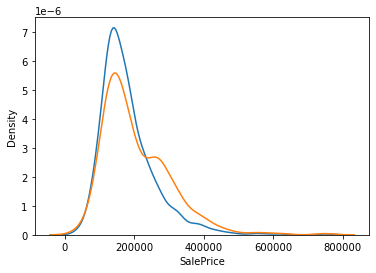

In [10]:
## plot y distribution 
housing_ru.reset_index(inplace=True)

seaborn.kdeplot(housing["SalePrice"], label="Original")
seaborn.kdeplot(housing_ru["SalePrice"], label="Modified")
plt.show()

## Conclusion
In this example, we covered the fundamentals of Random Undersampling. We utilized the Ames Housing Dataset to conduct under-sample the majority class(es) by randomly picking samples with or without replacement with the minimum required arguments. 

Random Undersampling under-sampled "majority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.



## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education 19(3). https://doi.org/10.1080/10691898.2011.11889627.

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index.
https://pypi.org/project/smogn. 